# The Outer Solar System
### Yingbo Ma, Chris Rackauckas
This example is from https://github.com/SciML/DiffEqTutorials.jl/blob/master/notebook/models/07-outer_solar_system.ipynb

## Data

The chosen units are: masses relative to the sun, so that the sun has mass $1$. We have taken $m_0 = 1.00000597682$ to take account of the inner planets. Distances are in astronomical units , times in earth days, and the gravitational constant is thus $G = 2.95912208286 \cdot 10^{-4}$.

| planet | mass | initial position | initial velocity |
| --- | --- | --- | --- |
| Jupiter | $m_1 = 0.000954786104043$ | <ul><li>-3.5023653</li><li>-3.8169847</li><li>-1.5507963</li></ul> | <ul><li>0.00565429</li><li>-0.00412490</li><li>-0.00190589</li></ul>
| Saturn | $m_2 = 0.000285583733151$ | <ul><li>9.0755314</li><li>-3.0458353</li><li>-1.6483708</li></ul> | <ul><li>0.00168318</li><li>0.00483525</li><li>0.00192462</li></ul>
| Uranus | $m_3 = 0.0000437273164546$ | <ul><li>8.3101420</li><li>-16.2901086</li><li>-7.2521278</li></ul> | <ul><li>0.00354178</li><li>0.00137102</li><li>0.00055029</li></ul>
| Neptune | $m_4 = 0.0000517759138449$ | <ul><li>11.4707666</li><li>-25.7294829</li><li>-10.8169456</li></ul> | <ul><li>0.00288930</li><li>0.00114527</li><li>0.00039677</li></ul>
| Pluto | $ m_5 = 1/(1.3 \cdot 10^8 )$ | <ul><li>-15.5387357</li><li>-25.2225594</li><li>-3.1902382</li></ul> | <ul><li>0.00276725</li><li>-0.00170702</li><li>-0.00136504</li></ul>

The data is taken from the book "Geometric Numerical Integration" by E. Hairer, C. Lubich and G. Wanner.

In [4]:
import Pkg; Pkg.add("OrdinaryDiffEq"); Pkg.add("DiffEqPhysics"); Pkg.add("RecursiveArrayTools")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [5]:
using Plots, OrdinaryDiffEq, DiffEqPhysics, RecursiveArrayTools
gr()

G = 2.95912208286e-4
M = [1.00000597682, 0.000954786104043, 0.000285583733151, 0.0000437273164546, 0.0000517759138449, 1/1.3e8]
planets = ["Sun", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

pos_x = [0.0,-3.5023653,9.0755314,8.3101420,11.4707666,-15.5387357]
pos_y = [0.0,-3.8169847,-3.0458353,-16.2901086,-25.7294829,-25.2225594]
pos_z = [0.0,-1.5507963,-1.6483708,-7.2521278,-10.8169456,-3.1902382]
pos = ArrayPartition(pos_x,pos_y,pos_z)

vel_x = [0.0,0.00565429,0.00168318,0.00354178,0.00288930,0.00276725]
vel_y = [0.0,-0.00412490,0.00483525,0.00137102,0.00114527,-0.00170702]
vel_z = [0.0,-0.00190589,0.00192462,0.00055029,0.00039677,-0.00136504]
vel = ArrayPartition(vel_x,vel_y,vel_z)

tspan = (0.,200_000)

(0.0, 200000)

The N-body problem's Hamiltonian is

$$H(p,q) = \frac{1}{2}\sum_{i=0}^{N}\frac{p_{i}^{T}p_{i}}{m_{i}} - G\sum_{i=1}^{N}\sum_{j=0}^{i-1}\frac{m_{i}m_{j}}{\left\lVert q_{i}-q_{j} \right\rVert}$$

Here, we want to solve for the motion of the five outer planets relative to the sun, namely, Jupiter, Saturn, Uranus, Neptune and Pluto.

In [6]:
const ∑ = sum
const N = 6
potential(p, t, x, y, z, M) = -G*∑(i->∑(j->(M[i]*M[j])/sqrt((x[i]-x[j])^2 + (y[i]-y[j])^2 + (z[i]-z[j])^2), 1:i-1), 2:N)

potential (generic function with 1 method)

## Hamiltonian System

`NBodyProblem` constructs a second order ODE problem under the hood. We know that a Hamiltonian system has the form of

$$\dot{p} = -H_{q}(p,q)\quad \dot{q}=H_{p}(p,q)$$

For an N-body system, we can symplify this as:

$$\dot{p} = -\nabla{V}(q)\quad \dot{q}=M^{-1}p.$$

Thus $\dot{q}$ is defined by the masses. We only need to define $\dot{p}$, and this is done internally by taking the gradient of $V$. Therefore, we only need to pass the potential function and the rest is taken care of.

In [7]:
nprob = NBodyProblem(potential, M, pos, vel, tspan)
sol = solve(nprob,Yoshida6(), dt=100);

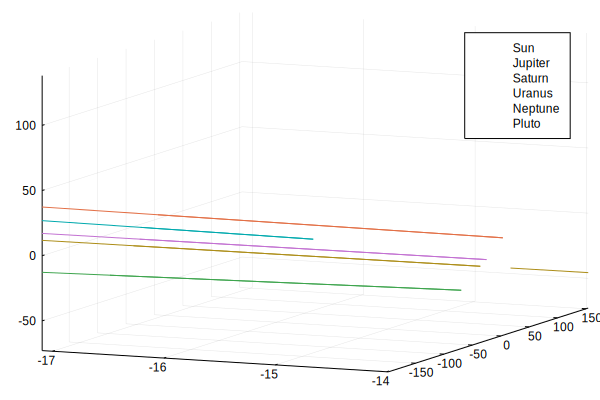

In [8]:
orbitplot(sol,body_names=planets)